# Getting started with prtecan

In [1]:
import hashlib
import os
import warnings

import arviz as az
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from clophfit import prtecan
from clophfit.binding import fitting, plotting
from clophfit.prtecan import Titration, TitrationAnalysis

%load_ext autoreload
%autoreload 2

os.chdir("../../tests/Tecan/140220/")

## Parsing a Single Tecan File

A Tecan file comprises of multiple label blocks, each with its unique metadata. This metadata provides critical details and context for the associated label block. In addition, the Tecan file itself also has its overarching metadata that describes its overall content.

When the KEYS for label blocks are identical, it indicates that these label blocks are equivalent - meaning, they contain the same measurements. The equality of KEYS plays a significant role in parsing and analyzing Tecan files, as it assists in identifying and grouping similar measurement sets together. This understanding of label block equivalence based on KEY similarity is critical when working with Tecan files.

In [2]:
tf = prtecan.Tecanfile("../290212_6.38.xls")
lb0 = tf.labelblocks[0]
tf.metadata

{'Device: infinite 200': Metadata(value='Serial number: 810002712', unit=['Serial number of connected stacker:']),
 'Firmware: V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)': Metadata(value='MAI, V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)', unit=None),
 'Date:': Metadata(value='29/02/2012', unit=None),
 'Time:': Metadata(value='15.57.05', unit=None),
 'System': Metadata(value='TECANROBOT', unit=None),
 'User': Metadata(value='TECANROBOT\\Administrator', unit=None),
 'Plate': Metadata(value='PE 96 Flat Bottom White   [PE.pdfx]', unit=None),
 'Plate-ID (Stacker)': Metadata(value='Plate-ID (Stacker)', unit=None),
 'Shaking (Linear) Duration:': Metadata(value=50, unit=['s']),
 'Shaking (Linear) Amplitude:': Metadata(value=2, unit=['mm'])}

In [3]:
lb0.metadata

{'Label': Metadata(value='Label1', unit=None),
 'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
 'Excitation Wavelength': Metadata(value=400, unit=['nm']),
 'Emission Wavelength': Metadata(value=535, unit=['nm']),
 'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
 'Emission Bandwidth': Metadata(value=25, unit=['nm']),
 'Gain': Metadata(value=81, unit=['Manual']),
 'Number of Flashes': Metadata(value=10, unit=None),
 'Integration Time': Metadata(value=20, unit=['µs']),
 'Lag Time': Metadata(value='µs', unit=None),
 'Settle Time': Metadata(value='ms', unit=None),
 'Start Time:': Metadata(value='29/02/2012 15.57.55', unit=None),
 'Temperature': Metadata(value=26.0, unit=['°C']),
 'End Time:': Metadata(value='29/02/2012 15.58.35', unit=None)}

In [4]:
print(lb0.data)

{'A01': 30072.0, 'A02': 27276.0, 'A03': 22249.0, 'A04': 30916.0, 'A05': 27943.0, 'A06': 25130.0, 'A07': 26765.0, 'A08': 27836.0, 'A09': 23084.0, 'A10': 31370.0, 'A11': 16890.0, 'A12': 22136.0, 'B01': 22336.0, 'B02': 31327.0, 'B03': 24855.0, 'B04': 32426.0, 'B05': 30066.0, 'B06': 27018.0, 'B07': 28269.0, 'B08': 27570.0, 'B09': 31310.0, 'B10': 24358.0, 'B11': 22595.0, 'B12': 20355.0, 'C01': 23232.0, 'C02': 32241.0, 'C03': 28309.0, 'C04': 26642.0, 'C05': 28818.0, 'C06': 26638.0, 'C07': 26423.0, 'C08': 29441.0, 'C09': 28541.0, 'C10': 29656.0, 'C11': 29841.0, 'C12': 25738.0, 'D01': 26578.0, 'D02': 22280.0, 'D03': 36219.0, 'D04': 25735.0, 'D05': 35433.0, 'D06': 27376.0, 'D07': 22497.0, 'D08': 35681.0, 'D09': 26154.0, 'D10': 32311.0, 'D11': 27495.0, 'D12': 22459.0, 'E01': 27576.0, 'E02': 26058.0, 'E03': 28882.0, 'E04': 26188.0, 'E05': 27531.0, 'E06': 31269.0, 'E07': 26757.0, 'E08': 26427.0, 'E09': 27764.0, 'E10': 27184.0, 'E11': 26556.0, 'E12': 18494.0, 'F01': 22120.0, 'F02': 26642.0, 'F03': 

## Group a list of tecan files into a titration

The command Titration.fromlistfile("../listfile") reads a list of Tecan files, identifies unique measurements in each file, groups matching ones, and combines them into a titration set for further analysis.

In [5]:
tit = Titration.fromlistfile("../list.pH")
tit.conc

[5.78, 6.38, 6.83, 7.24, 7.67, 8.23, 8.82, 9.31]

In [6]:
lbg0 = tit.labelblocksgroups[0]
lbg1 = tit.labelblocksgroups[1]
lbg0.metadata, lbg1.metadata

({'Label': Metadata(value='Label1', unit=None),
  'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
  'Excitation Wavelength': Metadata(value=400, unit=['nm']),
  'Emission Wavelength': Metadata(value=535, unit=['nm']),
  'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
  'Emission Bandwidth': Metadata(value=25, unit=['nm']),
  'Number of Flashes': Metadata(value=10, unit=None),
  'Integration Time': Metadata(value=20, unit=['µs']),
  'Lag Time': Metadata(value='µs', unit=None),
  'Settle Time': Metadata(value='ms', unit=None),
  'Gain': Metadata(value=81, unit=None)},
 {'Label': Metadata(value='Label2', unit=None),
  'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
  'Excitation Wavelength': Metadata(value=485, unit=['nm']),
  'Emission Wavelength': Metadata(value=535, unit=['nm']),
  'Excitation Bandwidth': Metadata(value=25, unit=['nm']),
  'Emission Bandwidth': Metadata(value=25, unit=['nm']),
  'Number of Flashes': Metadata(value=10, unit=None),


In [7]:
lbg0.labelblocks[5].metadata["Temperature"]

Metadata(value=25.6, unit=['°C'])

In [8]:
lbg0.data["A01"], lbg0.data["H12"]

([30344.0, 30072.0, 31010.0, 32678.0, 33731.0, 36506.0, 37967.0, 37725.0],
 [21287.0, 20888.0, 21209.0, 21711.0, 22625.0, 23397.0, 24791.0, 25045.0])

## pH titration analysis

PlateScheme(file='./scheme.txt', _buffer=['D01', 'E01', 'D12', 'E12'], _ctrl=['H12', 'F12', 'F01', 'B12', 'A12', 'C12', 'B01', 'C01', 'G12', 'G01', 'A01', 'H01'], _names={'G03': {'H12', 'B12', 'A01'}, 'NTT': {'C12', 'F01', 'F12'}, 'S202N': {'G12', 'C01', 'H01'}, 'V224Q': {'B01', 'A12', 'G01'}})

Additions = [100, 2, 2, 2, 2, 2, 2].



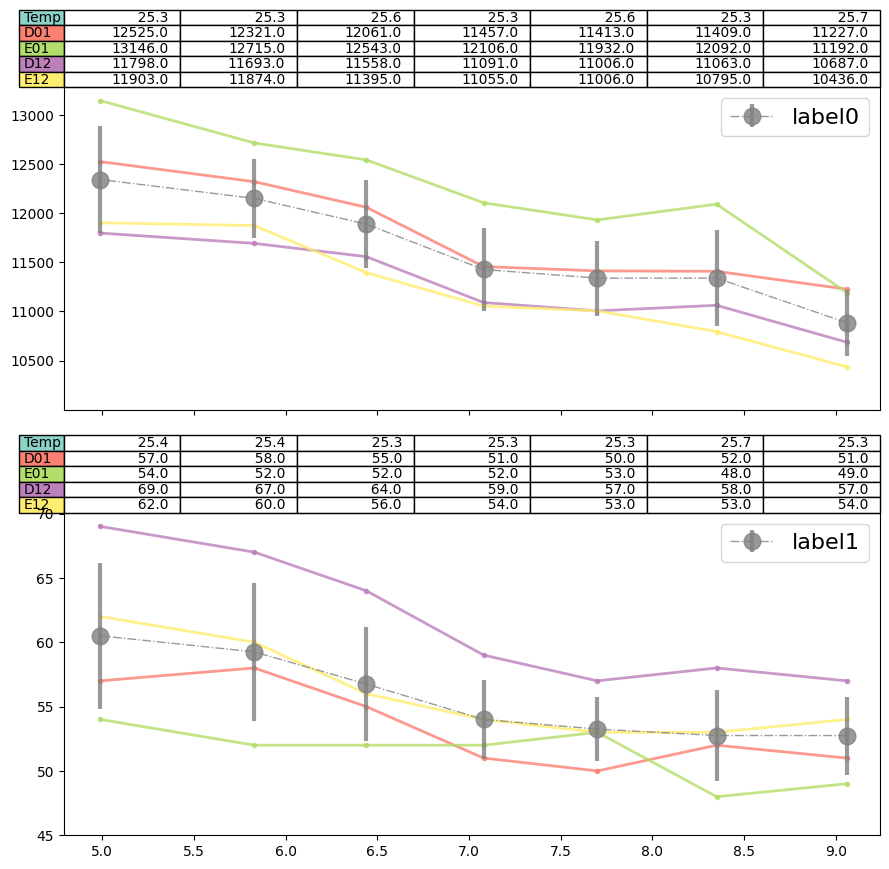

In [28]:
warnings.filterwarnings("ignore", category=UserWarning, module="clophfit.prtecan")

ph_an = TitrationAnalysis.fromlistfile("./list.pH")
ph_an.load_scheme("./scheme.txt")
print(ph_an.scheme)
ph_an.load_additions("additions.pH")
print(f"\nAdditions = {ph_an.additions}.\n")
g = ph_an.plot_buffer()

In [29]:
ph_an.fitresults

{'kind': 'pH', 'ini': 0, 'fin': -1, 'no_weight': False, 'tval': 0.95}
{'bg': True, 'nrm': True, 'dil': True}
{'bg': True, 'nrm': True, 'dil': True}


[     ss                                                msg  df      tval  \
 F08   1  Both actual and predicted relative reductions ...   3  3.182446   
 F09   1  Both actual and predicted relative reductions ...   3  3.182446   
 G03   1  Both actual and predicted relative reductions ...   3  3.182446   
 C06   1  Both actual and predicted relative reductions ...   3  3.182446   
 C12   1  Both actual and predicted relative reductions ...   3  3.182446   
 ..   ..                                                ...  ..       ...   
 A11   1  Both actual and predicted relative reductions ...   3  3.182446   
 B08   1  Both actual and predicted relative reductions ...   3  3.182446   
 C04   1  Both actual and predicted relative reductions ...   3  3.182446   
 E03   1  Both actual and predicted relative reductions ...   3  3.182446   
 D02   1  Both actual and predicted relative reductions ...   3  3.182446   
 
           chisqr         K           SA           SB        sK         sS

### Reassign Buffer Wells

In the ClopHfit.prtecan module, you can reassess buffer wells, updating the data to account for any dilution (additions) and subtracting the updated buffer value. This is a handy feature that gives you more control over your analysis.

For instance, consider the following data for a particular well:

In [10]:
print(ph_an.labelblocksgroups[1].data["D01"])
print(ph_an.data[1]["D01"])

[51.0, 52.0, 50.0, 51.0, 55.0, 58.0, 57.0]
[-1.75, -0.765, -3.38, -3.18, -1.8900000000000001, -1.375, -3.9200000000000004]


You can reassign buffer wells using the `buffer_wells` attribute:

In [11]:
ph_an.buffer_wells = ["D01", "E01"]

This updates the data for the specified wells, correcting for dilution and subtracting the buffer value:

In [12]:
print(ph_an.labelblocksgroups[1].data["D01"])
print(ph_an.data[1]["D01"])

[51.0, 52.0, 50.0, 51.0, 55.0, 58.0, 57.0]
[1.0, 2.04, -1.56, -0.53, 1.62, 3.3000000000000003, 1.6800000000000002]


The original data remains unchanged in `labelblocksgroups` while the adjusted data is available in `data`, providing a clear and accurate reflection of the process.

### Fitting

In [13]:
ph_an.data[1]["A01"]

[4649.0,
 3785.2200000000003,
 2060.76,
 830.51,
 474.66,
 321.20000000000005,
 259.28000000000003]

In [14]:
ph_an.labelblocksgroups[1].data_buffersubtracted["A01"]

[4649.0, 3711.0, 1981.5, 783.5, 439.5, 292.0, 231.5]

In [15]:
# ph_an.datafit_params = {"bg": True}

In [16]:
ph_an.datafit_params = {"bg": 1, "nrm": 0, "dil": 1}
ph_an.datafit[1]["E06"]

[9218.0,
 7181.82,
 3453.32,
 1445.3100000000002,
 798.6600000000001,
 619.3000000000001,
 324.24]

In [17]:
ph_an.data[1]["E06"]

[9218.0,
 7181.82,
 3453.32,
 1445.3100000000002,
 798.6600000000001,
 619.3000000000001,
 324.24]

In [18]:
ph_an.fitresults[1]

{'bg': 1, 'nrm': 0, 'dil': 1}
{'bg': 1, 'nrm': 0, 'dil': 1}


,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
F08,1,Both actual and predicted relative reductions ...,3,3.182446,277.399632,7.946062,245.854744,3485.428843,0.037943,37.084418,65.705387,NaN
F09,1,Both actual and predicted relative reductions ...,3,3.182446,362.426166,7.872642,263.160674,3920.062297,0.037638,43.486145,70.819188,NaN
G03,1,Both actual and predicted relative reductions ...,3,3.182446,23011.102013,7.973489,234.189682,7129.252954,0.163745,334.643650,612.406905,NaN
C06,1,Both actual and predicted relative reductions ...,3,3.182446,3322.519691,7.074582,419.012477,3441.113931,0.135973,198.959783,139.411048,NaN
C12,1,Both actual and predicted relative reductions ...,3,3.182446,145.673618,7.559628,359.815432,2485.889022,0.039118,31.313914,36.574836,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...
A11,1,Both actual and predicted relative reductions ...,3,3.182446,6007.681893,7.044073,773.785641,5032.265992,0.130672,273.852354,185.326454,NaN
B08,1,Both actual and predicted relative reductions ...,3,3.182446,7834.477123,7.196825,540.470923,2304.012455,0.350405,280.519765,224.839606,NaN
C04,1,Both actual and predicted relative reductions ...,3,3.182446,33869.141434,7.074948,1013.521126,4306.650720,0.398369,635.054330,445.171956,NaN
E03,1,Both actual and predicted relative reductions ...,3,3.182446,329.912514,7.933957,154.665787,2679.236799,0.052908,40.610099,70.943180,NaN


In [19]:
ph_an.fit("pH")

{'bg': 1, 'nrm': 0, 'dil': 1}
{'bg': 1, 'nrm': 0, 'dil': 1}


[     ss                                                msg  df      tval  \
 F08   1  Both actual and predicted relative reductions ...   4  2.776445   
 F09   1  Both actual and predicted relative reductions ...   4  2.776445   
 G03   1  Both actual and predicted relative reductions ...   4  2.776445   
 C06   1  Both actual and predicted relative reductions ...   4  2.776445   
 C12   1  Both actual and predicted relative reductions ...   4  2.776445   
 ..   ..                                                ...  ..       ...   
 A11   1  Both actual and predicted relative reductions ...   4  2.776445   
 B08   1  Both actual and predicted relative reductions ...   4  2.776445   
 C04   1  Both actual and predicted relative reductions ...   4  2.776445   
 E03   1  Both actual and predicted relative reductions ...   4  2.776445   
 D02   1  Both actual and predicted relative reductions ...   4  2.776445   
 
            chisqr         K            SA            SB         sK  \
 F0

In [20]:
ph_an.fitresults[1]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
F08,1,Both actual and predicted relative reductions ...,3,3.182446,277.399632,7.946062,245.854744,3485.428843,0.037943,37.084418,65.705387,NaN
F09,1,Both actual and predicted relative reductions ...,3,3.182446,362.426166,7.872642,263.160674,3920.062297,0.037638,43.486145,70.819188,NaN
G03,1,Both actual and predicted relative reductions ...,3,3.182446,23011.102013,7.973489,234.189682,7129.252954,0.163745,334.643650,612.406905,NaN
C06,1,Both actual and predicted relative reductions ...,3,3.182446,3322.519691,7.074582,419.012477,3441.113931,0.135973,198.959783,139.411048,NaN
C12,1,Both actual and predicted relative reductions ...,3,3.182446,145.673618,7.559628,359.815432,2485.889022,0.039118,31.313914,36.574836,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...
A11,1,Both actual and predicted relative reductions ...,3,3.182446,6007.681893,7.044073,773.785641,5032.265992,0.130672,273.852354,185.326454,NaN
B08,1,Both actual and predicted relative reductions ...,3,3.182446,7834.477123,7.196825,540.470923,2304.012455,0.350405,280.519765,224.839606,NaN
C04,1,Both actual and predicted relative reductions ...,3,3.182446,33869.141434,7.074948,1013.521126,4306.650720,0.398369,635.054330,445.171956,NaN
E03,1,Both actual and predicted relative reductions ...,3,3.182446,329.912514,7.933957,154.665787,2679.236799,0.052908,40.610099,70.943180,NaN


In [21]:
set(ph_an.__dict__.keys()) - set(tit.__dict__.keys())

{'_datafit',
 '_datafit_params',
 '_fit_args',
 '_fitresults',
 '_scheme',
 'fz',
 'keys_unk'}

In [22]:
from clophfit.binding import fit_titration

In [23]:
fit_titration("pH", ph_an.conc, ph_an.data[1][well])

NameError: name 'well' is not defined

In [ ]:
well = "H03"
y0 = np.array(ph_an.data[0][well])
y1 = np.array(ph_an.labelblocksgroups[1].data_buffersubtracted_norm[well])
# y1 = np.array(ph_an.data[1][well])
x = np.array(ph_an.conc)
ds = fitting.Dataset(x, {"y1": y1}, is_ph=True)
rfit = fitting.fit_binding_glob(ds)
rfit.result.params

In [ ]:
l = [1, 2, 3]

In [ ]:
l[-1]

In [ ]:
rfit.result

In [ ]:
remcee = rfit.mini.emcee(burn=50, steps=500, workers=8, thin=10)

In [ ]:
f, hdi = plotting.plot_emcee(remcee)
print(hdi)

In [ ]:
samples = remcee.flatchain[["K"]]
# Convert the dictionary of flatchains to an ArviZ InferenceData object
samples_dict = {key: np.array(val) for key, val in samples.items()}
idata = az.from_dict(posterior=samples_dict)
k_samples = idata.posterior["K"].values
percentile_value = np.percentile(k_samples, 3)
print(f"Value at which the probability of being higher is 99%: {percentile_value}")

az.plot_forest(k_samples)

## Cl titration analysis

In [ ]:
cl_an = prtecan.TitrationAnalysis.fromlistfile("list.cl")
cl_an.load_scheme("scheme.txt")
cl_an.scheme

In [ ]:
cl_an.load_additions("additions.cl")
print(cl_an.conc)
cl_an.conc = prtecan.calculate_conc(cl_an.additions, 1000)
cl_an.conc

In [ ]:
lbg = cl_an.labelblocksgroups[1]
x = cl_an.conc
plt.plot(x, lbg.data["D01"])
plt.plot(x, lbg.data["E01"])
plt.plot(x, lbg.data["D12"])
plt.plot(x, lbg.data["E12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["D12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["E12"])
plt.plot(x, lbg.data["A11"])
plt.plot(x, np.array(cl_an.labelblocksgroups[1].data["A11"]) / 2, "--")

In [ ]:
lbg.labelblocks[1].buffer

In [ ]:
f = cl_an.plot_buffer()

## Fitting

TitrationAnalysis class need API changes to better rationalize its use.

In [ ]:
ph_an.fit("pH", fin=-1, tval=0.95)
type(ph_an.fittings)

In [ ]:
# ph_an.fittings[1].to_csv('fit1-1.csv')
ph_an.fittings[1]

In [ ]:
ph_an.fittings[1].loc[["H06", "A01"]]

In [ ]:
key = "H06"
lbg = ph_an.labelblocksgroups[1]
x = ph_an.conc
y = lbg.data[key]
dd = prtecan.prtecan.fit_titration("pH", x[:-1], y[:-1])
dd

In [ ]:
ph_an.plot_well("H06")

In [ ]:
f = ph_an.plot_k(1, title="2014-12-23")

In [ ]:
cl_an.fit("Cl", fin=None)

In [ ]:
cl_an.plot_all_wells("cl.pdf")

In [ ]:
ph_an.print_fitting(2)

### selection

In [ ]:
f = ph_an.plot_ebar(0)

In [ ]:
f = ph_an.plot_ebar(2, xmin=7.7, ymin=25)

In [ ]:
import seaborn as sb

sb.set_style("whitegrid")
g = sb.PairGrid(
    ph_an.fittings[0],
    x_vars=["K", "SA", "SB"],
    y_vars=["K", "SA", "SB"],
    # hue='SB',
    palette="Blues",
    diag_sharey=False,
)

g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot, fill=True)
g.map_diag(sb.kdeplot)

Fit first (0) and second (1) dataset and global (2).

In [ ]:
with sb.axes_style("darkgrid"):
    g = sb.pairplot(
        ph_an.fittings[2][["SA", "SB", "K", "SA2", "SB2"]],
        # hue='SB',
        palette="Reds",
        corner=True,
        diag_kind="kde",
    )

In [ ]:
from pandas.plotting import scatter_matrix


def plot_matrix(tit, lb):
    df = tit.fittings[lb].loc[tit.keys_unk]
    try:
        f = scatter_matrix(
            df[["K", "SA", "SB", "SA2", "SB2"]],
            figsize=(14, 14),
            diagonal="kde",
            alpha=0.8,
        )
    except KeyError:
        f = scatter_matrix(
            df[["K", "SA", "SB"]], figsize=(10, 10), diagonal="kde", alpha=0.8
        )
    return f


f = plot_matrix(ph_an, 2)

### combining

In [ ]:
res_unk = ph_an.fittings[1].loc[ph_an.keys_unk].sort_index()
res_unk["well"] = res_unk.index

In [ ]:
# g = sns.FacetGrid(data=res2, row='well',  margin_titles=True)
# g.map(plt.errorbar, 'K', range(1), xerr='sK', palette='Oranges_d') # x, y,
f = plt.figure(figsize=(24, 14))

# Make the PairGrid
g = sb.PairGrid(
    res_unk,
    x_vars=["K", "SA", "SB"],
    y_vars="well",
    height=12,
    aspect=0.4,
)


# Draw a dot plot using the stripplot function
g.map(sb.stripplot, size=14, orient="h", palette="Set2", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["$pK_a$", "B$_{neutral}$", "B$_{anionic}$"]


for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sb.despine(left=True, bottom=True)